## Walking through Plotly and Pandas and IPython Widgets

In [20]:
from IPython.display import Image
Image(url='http://i.imgur.com/OUVRQ1u.gif')

In [4]:
from IPython.html import widgets 
from IPython.display import display, clear_output

import plotly.plotly as py
from plotly.graph_objs import *
import plotly
from plotly.widgets import GraphWidget

import pandas as pd

##### Download 75MB csv file

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/widgets/master/ipython-examples/311_150k.csv', infer_datetime_format=True)
df = df
df.head()

/Users/chris/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1154: DtypeWarning:

Columns (8,39,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.



,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,29300358,11/16/2014 11:46:00 PM,11/16/2014 11:46:00 PM,DSNY,BCC - Queens East,Derelict Vehicles,14 Derelict Vehicles,Street,11432,80-25 PARSONS BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.719411,-73.808882,"(40.719410639341916, -73.80888158860446)"
1,29299837,11/16/2014 02:24:35 AM,11/16/2014 02:24:35 AM,DOB,Department of Buildings,Building/Use,Illegal Conversion Of Residential Building/Space,NaN,10465,938 HUNTINGTON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.827862,-73.830641,"(40.827862046105416, -73.83064067165407)"
2,29297857,11/16/2014 02:17:12 AM,11/16/2014 02:50:48 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11201,229 DUFFIELD STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.691248,-73.984375,"(40.69124772858873, -73.98437529459297)"
3,29294647,11/16/2014 02:15:13 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10040,128 NAGLE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.861248,-73.926308,"(40.861247930170535, -73.92630783362215)"
4,29300211,11/16/2014 02:14:01 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10306,625 LINCOLN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.570565,-74.092229,"(40.57056460126485, -74.09222907551542)"


#### Create a simple bar chart with Plotly

In [7]:
df['Complaint Type'].value_counts()

HEAT/HOT WATER              32202
Street Light Condition       7558
Blocked Driveway             6997
UNSANITARY CONDITION         6174
PAINT/PLASTER                5388
Illegal Parking              5381
Street Condition             4847
Noise                        4615
PLUMBING                     4284
Water System                 3323
Noise - Commercial           3206
DOOR/WINDOW                  3194
Traffic Signal Condition     2766
WATER LEAK                   2501
Dirty Conditions             2283
...
Lifeguard                               2
Illegal Animal Sold                     2
Internal Code                           2
Special Natural Area District (SNAD)    2
Fire Alarm - Replacement                2
Highway Sign - Dangling                 2
Public Toilet                           2
Radioactive Material                    1
Calorie Labeling                        1
DHS Income Savings Requirement          1
Window Guard                            1
Poison Ivy              

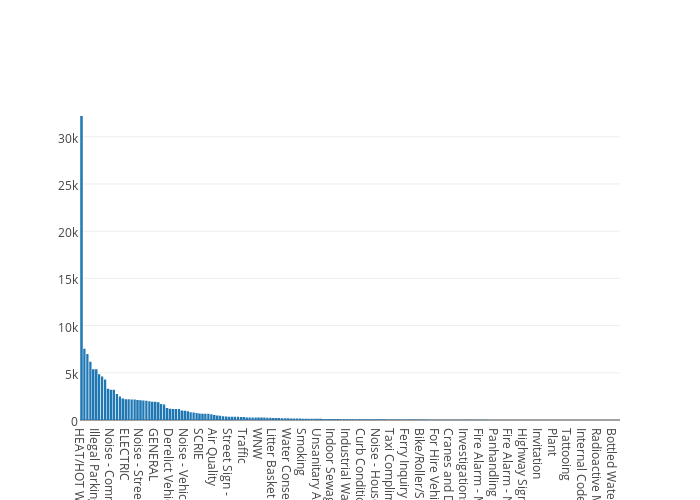

In [8]:
c = df['Complaint Type'].value_counts()
url = py.plot([Bar(x=c.index, y=c.values)], filename='311 most common complaints', auto_open=False)
plotly.tools.embed(url)

#### Turn this graph into an IPython widget

In [9]:
graph = GraphWidget(url)

# Place the graph in a popup, so that we can move it around
popup = widgets.PopupWidget(
    children=[graph]
)
popup.set_css('display', 'none', selector='.btn')

popup

#### Update the graph widget with the most common counts of a different column
This update is done entirely in the client - `graph.restyle` sends data up to the browser client and communicates with the embedded Plotly graph

In [10]:
a = df['Agency Name'].value_counts()
graph.restyle({'x': [a.index], 'y': [a.values]})

#### IPython widget dropdowns

In [11]:
column_headers_dropdown = widgets.DropdownWidget()
column_headers_dropdown.values  = {column: column for column in df.columns}
column_headers_dropdown

'Complaint Type'

#### Re-graph the data on dropdown selection

In [12]:
def on_dropdown_selection(_, old_selection, new_selection):
    clear_output()
    display(new_selection)
    
    vc = df[new_selection].value_counts()

    graph.restyle({'x': [vc.index], 'y': [vc.values]})
    
column_headers_dropdown.on_trait_change(on_dropdown_selection, 'value')

## Search complaints

#### Simple dataframe filter

In [13]:
idx = df['Complaint Type'].str.contains('Tree').fillna(False)
df[idx]['Complaint Type'].value_counts()

Damaged Tree               2072
Overgrown Tree/Branches    1171
Dead Tree                   668
Illegal Tree Damage         150
dtype: int64

In [18]:
t = widgets.TextWidget()
t.description = 'Search complaint types (e.g. "Tree")'
t

u''

In [19]:
def on_text_input(_, old_text, new_text):
    clear_output()
    display(new_text)
    
    idx = df['Complaint Type'].str.contains(new_text).fillna(False)
    vc = df[idx][column_headers_dropdown.value].value_counts()
    
    graph.restyle({'x': [vc.index], 'y': [vc.values]})    
    
t.on_trait_change(on_text_input, 'value', remove=False)

In [2]:
# CSS styling within IPython notebook - feel free to re-use
from IPython.core.display import HTML
import urllib2

HTML(urllib2.urlopen('http://bit.ly/1Bf5Hft').read())

In [1]:
from IPython.display import display, HTML

display(HTML('<link href="//fonts.googleapis.com/css?family=Open+Sans:600,400,300,200|Inconsolata|Ubuntu+Mono:400,700" rel="stylesheet" type="text/css" />'))
display(HTML('<link rel="stylesheet" type="text/css" href="http://help.plot.ly/documentation/all_static/css/ipython-notebook-custom.css">'))

! pip install publisher --upgrade
import publisher
publisher.publish(
    'pandas_ipython_widgets.ipynb', 'pandas/ipython-widgets/', 'IPython Widgets Pandas | plotly',
    'How to make IPython Widgets in Pandas Python with Plotly.',
    name = 'IPython Notebook Widgets',
    thumbnail='thumbnail/ipython_widgets.jpg', language='pandas',
    page_type='example_index', has_thumbnail='true', display_as='chart_events', order=0)

Requirement already up-to-date: publisher in /anaconda/lib/python2.7/site-packages


//anaconda/lib/python2.7/site-packages/IPython/nbconvert.py:13: ShimWarning: The `IPython.nbconvert` package has been deprecated. You should import from ipython_nbconvert instead.
  "You should import from ipython_nbconvert instead.", ShimWarning)
//anaconda/lib/python2.7/site-packages/publisher/publisher.py:53: UserWarning: Did you "Save" this notebook before running this command? Remember to save, always save.
  warnings.warn('Did you "Save" this notebook before running this command? '
